<center><font color = '#0FF' size = '8%'>Research</font></center>

The diagnosis of heart disease is done on a combination of <b>clinical signs</b> and <b>test results</b>. The types of tests run will be chosen on the basis of what the physician thinks is going on, ranging from <b>electrocardiograms</b> and <b>cardiac computerized tomography (CT) scans</b>, to <b>blood tests</b> and <b>exercise stress tests</b>.

<font color = '#FFA500'><b>Looking at information of heart disease risk factors led us to the following:</b></font>
- High Cholesterol
- High Blood Pressure
- Diabetes
- Weight
- Family History
- Smoking

<font color = '#FFA500'><b>The major factors that cannot be changed are:</b></font>
- Increasing Age
- Male Gender
- Heredity

<font color = '#FFA500'><b>Major factors that can be modified are:</b></font>
- Smoking
- High Cholesterol
- High Blood Pressure
- Physical Inactiveness
- Being Overweight
- Having Diabetes.

<font color = '#FFA500'><b>Other factors include:</b></font>
- Stress
- Alcohol
- Poor Diet/Nutrition

We can see no reference to the 'number of major vessels', but given that the definition of heart disease is, "<b><i>What happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries?</i></b>", which seems logical. The more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, we would hypothesis that, if the model has some predictive ability, we could see these factors standing out as the most important.

<font color = '#BFBF00'><b>NOTE:</b> We have placed our `References` at the end of the notebook from where we have found the information regarding the above content.</font>

In [68]:
# Importing all necssary libraies for EDA (Exploratory Data Analysis)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# Reading the dataset for the analysis
df = pd.read_csv('1_1st dataset heart disease.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## A quick view on the dataset.

In [70]:
# Checking the datatype and null value in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [71]:
# Describe Function to find the different mathmatical term in the dataset.
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [72]:
# Checking null value in the dataset.
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [73]:
# Checking numerious columns.
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

<h4>
As we can see, the names are having some white space in between.
<br>
It would be better to remove them before proceeding.
</h4>

### Renaming the columns.

In [74]:
# Replacing the blank sapce in the name of the column of the dataset with the '_' underscore.
df.columns = [d.replace(' ', '_').lower() for d in df.columns]
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

In [75]:
# Renaming the column to easily understand the data of the given column.
df.rename({ 'sex' : 'gender', 'resting_bp_s' : 'resting_bps' }, axis = 1, inplace = True)
df.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_bps', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

<center><font color = '#0FF' size = '8%'>Exploratory Data Analysis (EDA):</font></center>

### Types of Variables:

In [76]:
# Checking the unique value of each column in the dataset.
df.nunique()

age                     50
gender                   2
chest_pain_type          4
resting_bps             67
cholesterol            222
fasting_blood_sugar      2
resting_ecg              3
max_heart_rate         119
exercise_angina          2
oldpeak                 53
st_slope                 4
target                   2
dtype: int64

### Continous Variables:
- age
- resting_bps
- cholesterol
- max_heart_rate
- oldpeak

### Categorical Variables:
- gender
- chest_pain_type
- target
- fasting_blood_sugar
- resting_ecg
- exercise_angina
- st_slope

In [77]:
# Assign the continuos varibables and catergorical variables into the the variables.
continuous_fields = ['age', 'resting_bps', 'cholesterol', 'max_heart_rate', 'oldpeak']
categorical_fields = ['gender', 'chest_pain_type', 'target', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope']

<center><font color = '#FF0' size = '5%'><u><b>Fields' Description:</b></u></font></center>

`age`: Age in years.
<br>
`gender`: 1 = Male and 0 = Female.
<br>
`chest_pain_type`: Type of pain in chest - 1 = Typical Angina, 2 = Atypical Angina, 3 = Non-Anginal Pain, and 4 = Asymptomatic.
<br>
`resting_bps`: Resting Blood Pressure (in mm Hg on admission to the hospital).
<br>
`cholesterol`: Serum Cholestoral in mg/dl (Milligrams per Deciliter).
<br>
`fasting_blood_sugar`: Is Fasting Blood Sugar > 120 mg/dl? 1 = True and 0 = False.
<br>
`resting_ecg`: Resting Electrocardiographic Results/Measurements (0 = Normal, 1 = Having ST-T Wave Abnormality, 2 = Showing Probable or Definite Left Ventricular Hypertrophy by Estes' Criteria).
<br>
`max_heart_rate`: Maximum Heart Rate Achieved.
<br>
`exercise_angina`: Exercise Induced Angina; 1 = Yes and 0 = No.
<br>
`oldpeak`: ST Depression Induced by Exercise Relative to Rest ('ST' relates to positions on the ECG plot).
<br>
`st_slope`: The slope of the peak exercise ST segment (1 = Upsloping, 2 = Flat, 3 = Downsloping).
<br>
`target`: The patient having Heart Disease; 1 = Yes and 0 = No.

<center><font color = '#0FF' size = '8%'>Outliers</font></center>

#### What are the outliers for each feature?

In [78]:
df.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_bps', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

### Concept of Outliers:
<img src = 'https://www.simplypsychology.org/wp-content/uploads/boxplot-outliers.png' />

However, as we saw in the `Figure 1`, the features are not as much correlated with each other. This brings us to use scatter plots instead of box plots as the outliers would not be dependent on other column(s).


In [79]:
def filter_label(label) -> str:
  '''
  Provides a filtered name for the given `label` so that it looks appealing to the user when displayed.

  # Parameter

  label : str
    Name of the field/column/text to be filtered.

  # Returns

  str
    A filtered string of the given `label`.
  '''
  return label.title().replace('_', ' ')

In [80]:
def outliers_graphical(data_frame, continuous_fields, kind = 'box') -> None:
  '''
  Plotting scatter plots for the outlier detection.

  # Parameters

  data_frame : Pandas.DataFrame
    Pandas DataFrame having data on which the outliers has to be detected.

  continuous_fields : list
    A list of strings in which the name of the columns in the `data_frame` as scatter plots are used with continuous variables.

  kind : str
    Type of chart to plot.
    Values: box, scatter.
  '''

  if kind == 'box':
    fig, axs = plt.subplots(ncols = len(continuous_fields), figsize = (15, 6))
  elif kind == 'scatter':
    fig, axs = plt.subplots(nrows = len(continuous_fields), figsize = (6, 15))
  else:
    return None

  iteration = 0
  for field in continuous_fields:
    axs[iteration].set_title(filter_label(field))

    # Switching between plotting the chosen chart.
    if kind == 'box':
      sns.boxplot(df[field], ax = axs[iteration])
    elif kind == 'scatter':
      sns.scatterplot(df[field], ax = axs[iteration])

    iteration += 1

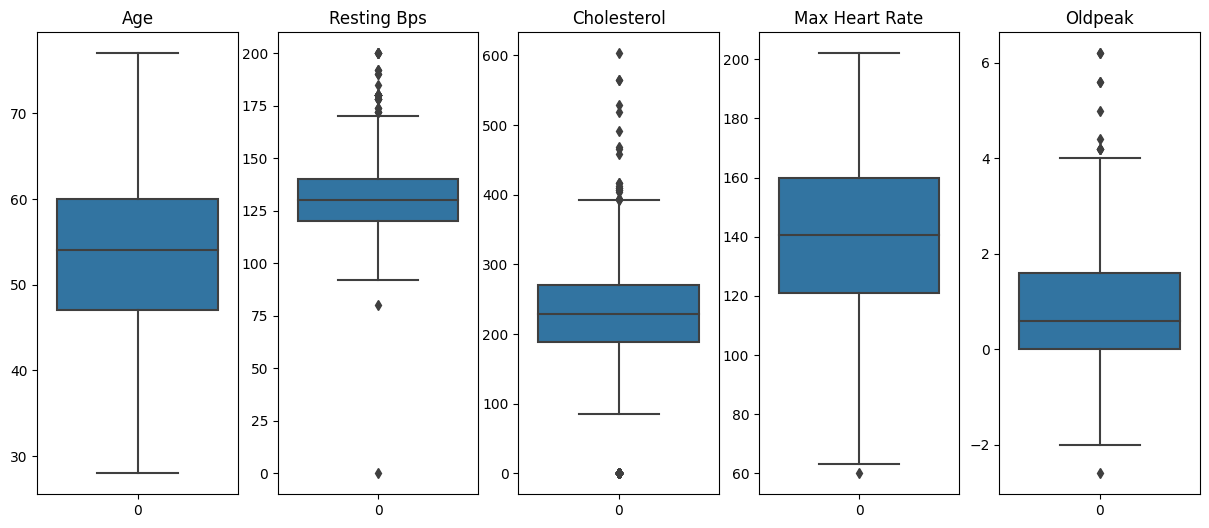

In [81]:
outliers_graphical(df, continuous_fields)

##### Even with the scatter plots, we are not that clear about all of the features regarding their outliers.
##### However, we can try `value_counts()` method to see the count of values in our dataset to gain more insights regarding the outliers.

In [82]:
def outliers_tabular(data_frame, fields, head_thres = 5, tail_thres = 0) -> None:
  '''
  Providing value-counts of each field for the outlier detection.
  # Parameters
  data_frame : Pandas.DataFrame
    Pandas DataFrame having data on which the outliers has to be detected.

  fields : list
    A list of strings in which the name of the columns in the `data_frame`.

  head_thres : int
    Threshold for showing number of values for outlier detection. Default: 5

  tail_thres : int
    Threshold for showing number of values for outlier detection. Default: 0
  '''

  # Iterating through all fields.
  for field in fields:
    # Number of records having values same in ascending order.
    records = data_frame[field].value_counts(ascending = True)

    # Head Records.
    print(f'{ filter_label(label = field) }:')
    print(records.head(head_thres))

    if tail_thres > 0: # Tail Records.
      print('...')
      print(records.tail(tail_thres))

    print()

In [83]:
outliers_tabular(data_frame = df, fields = continuous_fields, head_thres = 20, tail_thres = 2)

Age:
73     1
30     1
28     1
31     2
33     2
75     3
76     3
77     3
72     4
29     4
32     5
36     6
71     8
74     8
34     9
70    11
68    13
37    13
35    14
69    16
Name: age, dtype: int64
...
58    58
54    67
Name: age, dtype: int64

Resting Bps:
80     1
127    1
96     1
0      1
185    1
98     1
92     1
113    1
164    1
101    2
143    2
129    2
114    2
174    2
190    2
116    2
117    2
192    2
141    3
165    3
Name: resting_bps, dtype: int64
...
130    149
120    166
Name: resting_bps, dtype: int64

Cholesterol:
131    1
466    1
316    1
491    1
85     1
385    1
333    1
337    1
165    1
152    1
329    1
369    1
129    1
347    1
110    1
344    1
358    1
113    1
142    1
365    1
Name: cholesterol, dtype: int64
...
254     16
0      172
Name: cholesterol, dtype: int64

Max Heart Rate:
60     1
70     1
67     1
78     1
107    1
63     1
77     1
69     1
91     1
87     1
73     1
83     1
93     2
104    2
72     2
187    2
176    2
202    

#### From this, we can understand that there are some records having its occurance as 1 in the dataset.
#### For example, `oldpeak` is having 10 values that are occurs once.

#### However, this might not be as beneficial for this dataset.
#### So, let us see the unique values in the dataset.

In [84]:
# Unique values for the continuous variables.
df[continuous_fields].apply(pd.unique)

age               [40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...
resting_bps       [140, 160, 130, 138, 150, 120, 110, 136, 115, ...
cholesterol       [289, 180, 283, 214, 195, 339, 237, 208, 207, ...
max_heart_rate    [172, 156, 98, 108, 122, 170, 142, 130, 120, 9...
oldpeak           [0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...
dtype: object

#### As we can notice, the outliers are still there for some fields and they should be filtered before applying any machine learning model.

<center><font color = '#0FF' size = '6%'>Action on Outliers</font></center>

In [85]:
def calc_mean(data_frame, field) -> pd.DataFrame:
  '''
  Calculates the mean value for the given `data_frame` and `field`.

  # Parameters

  data_frame : Pandas.DataFrame
    Pandas DataFrame having the data to find the mean.

  field : str
    Name of the column on which the mean has to be calculated.

  # Returns

  Pandas.DataFrame
    A Pandas DataFrame having mean values imputed.
  '''

  # Fetching Q1 and Q3.
  q1 = data_frame[field].quantile(0.25)
  q3 = data_frame[field].quantile(0.75)

  iqr = q3 - q1 # Interquartile Range

  # Evaluating Minimum (Min) and Maximum (Max) of Quartile.
  min  = q1 - 1.5 * iqr
  max = q3 + 1.5 * iqr

  # Copying the dataframe to avoid any inplacements.
  d_outlier = data_frame.copy()

  # Fetches values between min and max and exclude the outliers.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)

  # Calculate the mean of data excluding outliers.
  mean = d_outlier.loc[~outliers, field].mean()

  # Filling the outliers with the mean.
  d_outlier.loc[outliers, field] = mean

  return d_outlier

def outlier_imputation(data_frame, field, method = 'mean') -> pd.DataFrame:
  '''
  Imputing the chosen `field` in the `data_frame` using the given `method`.

  # Parameters

  data_frame : Pandas.DataFrame
    Pandas DataFrame haivng the data on which the outlier has to be imputed.

  field : str
    Name of the field on which the imputation has to be done.

  method : str
    Method using which the imputation is to be done.
    1. 'mean' -> Impute using mean of the given `field`.

  # Returns

  Pandas.DataFrame
    A Pandas DataFrame imputed with the outlier value using the chosen `method`.
  '''

  # Switch between different value of `method`.
  if method == 'mean': # Mean
    return calc_mean(data_frame, field)
  else: # Default - Send Original DataFrame.
    return data_frame

def outlier_omission(data_frame, field, gt_eq = True, outlier_point = 0) -> pd.DataFrame:
  '''
  Omitting the chosen `field` in the `data_frame`.

  # Parameters

  data_frame : Pandas.DataFrame
    Pandas DataFrame haivng the data on which the outlier has to be imputed.

  field : str
    Name of the field on which the omitted has to be done.

  gt_eq : bool
    Removes the values greater than the provided `outlier_point` value when enabled, else goes to the less than operation.
    True = Greater Than
    False = Less Than
    Default: True

  outlier_point : int
    Value that becomes a wall for the outlier to be removed from the `field`.
    Default: 0

  # Returns

  Pandas.DataFrame
    A Pandas DataFrame imputed with the outlier value.
  '''

  return data_frame[data_frame[field] >= outlier_point] if gt_eq else data_frame[data_frame[field] <= outlier_point]

### Field - `resting_bps`:

In [86]:
# How many outliers exist for the `resting_bps` field.
outlier_value = 0
print(f'Total number of records having resting blood pressure as { outlier_value } mm/hg is { len(df[df.resting_bps == outlier_value]) }.')

Total number of records having resting blood pressure as 0 mm/hg is 1.


In general, a resting blood pressure of 0 mm Hg is not physiologically possible or compatible with life. Blood pressure is the force of blood against the walls of the arteries, and it is measured in millimeters of mercury (mm Hg). A blood pressure of 0 mm Hg would imply the absence of any blood flow or pressure in the arteries, which would mean that the heart is not pumping blood or that there is a complete lack of circulation.

Normal blood pressure ranges typically start from around 90/60 mm Hg, and a blood pressure of 0 mm Hg would suggest a severe medical emergency or critical condition, such as cardiac arrest or complete circulatory collapse.

In [87]:
df = outlier_imputation(data_frame = df, field = 'resting_bps', method = 'mean') # Activated Imputation Protocol.

<ipython-input-85-be7fb0a59f7f>:33: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)


### Field - `cholesterol`

In [88]:
print(f'Total number of records having cholesterol value as { len(df[df.cholesterol == 0]) } mg/dl.')

Total number of records having cholesterol value as 172 mg/dl.


It is extremely unlikely for a cholesterol level to be exactly 0 mg/dL when measured in milligrams per deciliter (mg/dL). Cholesterol is a fatty substance that is present in the cells of the body and is necessary for various physiological functions. Even in individuals with very low cholesterol levels, there is typically some measurable amount.

Normal cholesterol levels vary, but they are generally categorized into different types, including low-density lipoprotein (LDL), high-density lipoprotein (HDL), and total cholesterol. Extremely low cholesterol levels can sometimes be associated with certain medical conditions, malnutrition, or other health issues. However, even in these cases, the cholesterol level is not typically zero.

In [89]:
df = outlier_omission(data_frame = df, field = 'cholesterol', outlier_point = 1) # Activated Omission Protocol.
df = outlier_imputation(data_frame = df, field = 'cholesterol', method = 'mean') # Activated Imputation Protocol.
df = outlier_imputation(data_frame = df, field = 'cholesterol', method = 'mean') # Need to be done twice as for the first time not all values were imputed.

<ipython-input-85-be7fb0a59f7f>:33: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)
<ipython-input-85-be7fb0a59f7f>:33: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)


### Field - `max_heart_rate`

The range of Max Heart Rate lies between 60 - 200.

In [90]:
df = outlier_imputation(data_frame = df, field = 'max_heart_rate', method = 'mean') # Activated Imputation Protocol.

<ipython-input-85-be7fb0a59f7f>:33: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)


### Field - `oldpeak`

It is rarely possible that the value of oldpeak goes above 6 as it ranges between 0 - 6.

In [91]:
df = outlier_imputation(data_frame = df, field = 'oldpeak', method = 'mean') # Activated Imputation Protocol.
df = outlier_imputation(data_frame = df, field = 'oldpeak', method = 'mean') # Need to be done twice as for the first time not all values were imputed.

<ipython-input-85-be7fb0a59f7f>:33: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)
<ipython-input-85-be7fb0a59f7f>:33: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers = ~d_outlier[field].between(min, max, inclusive = False)


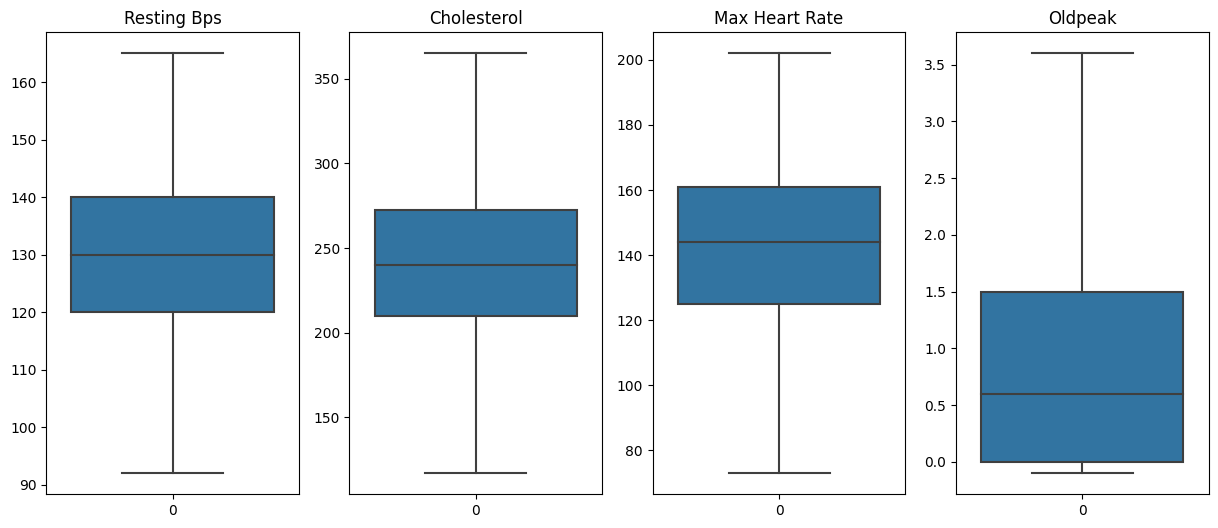

In [92]:
# Box-Plots of the fields after the imputation process.
outliers_graphical(df, ['resting_bps', 'cholesterol', 'max_heart_rate', 'oldpeak'])

#### The above graph shows more how the values are more appropriate because the box plot drawn shows normal distribution.

<center><font color = '#0DD' size = '6%'>Exploring The Data:</font></center>

## Distributions of Fields

In [93]:
def plot_distribution(field, field_label, bins = 20) -> None:
  '''
  Plots the histogram for the provided `field` to understand the distribution of the data.

  # Parameters

  field : Pandas.Series
    Instance of Serires for plotting the histogram.

  field_label : str
    Label data for printing in the title.

  bins : int
    It is the same parameter as passed for the `bins` in the plot() method for the provided `field`.
    Default: 20
  '''

  # Plot the Histogram.
  field.plot(kind = 'hist', bins = bins, title = f'Distribution of { field_label }', color = '#0FF', ec = '#00F', density = True)

### Continuous Variables

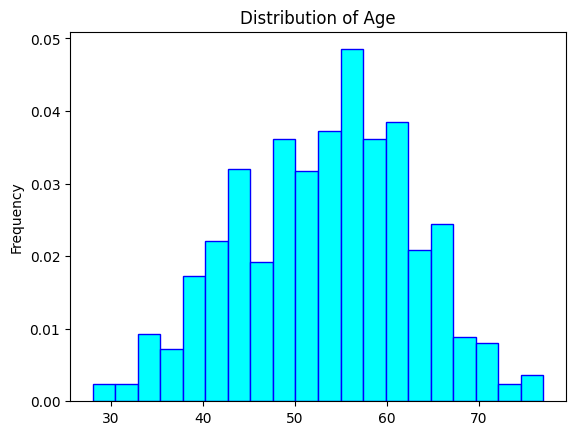

In [94]:
# Distribution of `age`.
# Bins are calculated as 2% of the total data in the dataset.
plot_distribution(field = df.age, field_label = 'Age', bins = int(len(df) * 0.02))

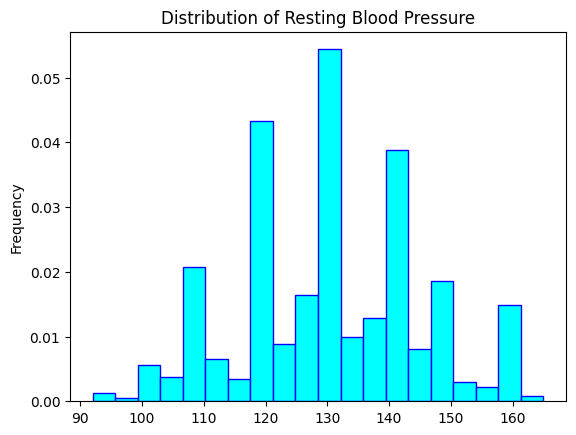

In [95]:
# Distribution of `resting_bps`.
plot_distribution(field = df.resting_bps, field_label = 'Resting Blood Pressure', bins = int(len(df) * 0.02)) # Bins are calculated as 2% of the total data in the dataset.

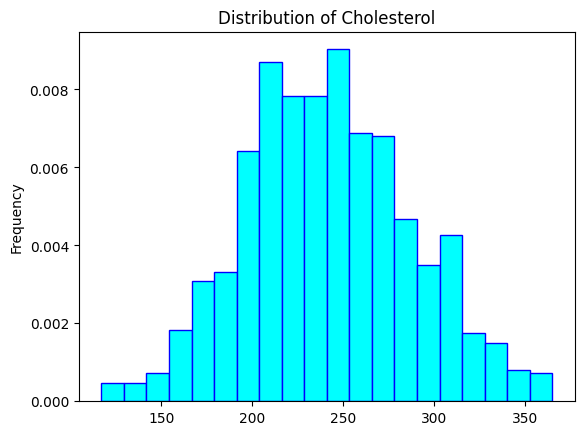

In [96]:
# Distribution of `cholesterol`.
plot_distribution(field = df.cholesterol, field_label = 'Cholesterol', bins = int(len(df) * 0.02)) # Bins are calculated as 2% of the total data in the dataset.

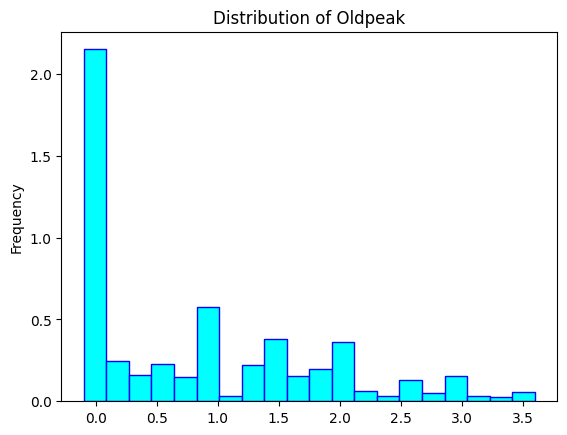

In [97]:
# Distribution of `oldpeak`.
plot_distribution(field = df.oldpeak, field_label = 'Oldpeak', bins = int(len(df) * 0.02)) # Bins are calculated as 2% of the total data in the dataset.

### Categorical Variables

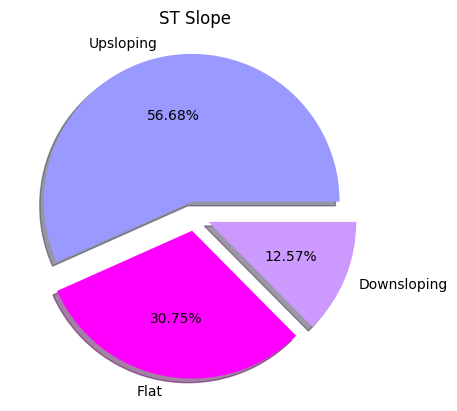

In [98]:
# Categories of ST Slope.

plt.pie(df.resting_ecg.value_counts(),
        labels = ['Upsloping', 'Flat', 'Downsloping'],
        colors = ['#99F', '#F0F', '#C9F'],
        autopct = '%.2f%%',
        explode = [0.1, 0.1, 0.1],
        shadow = True)

# Chart Decoration.
plt.title('ST Slope')

plt.show()

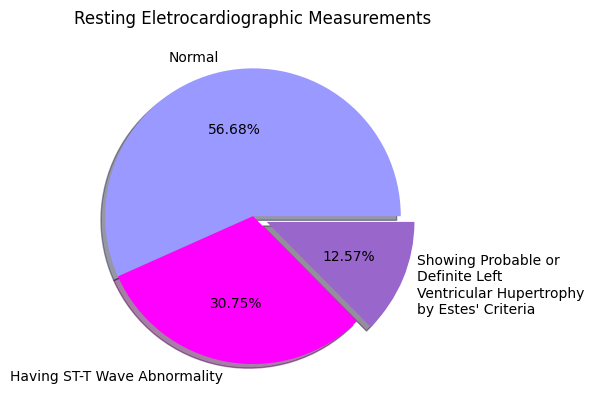

In [99]:
# Categories of Resting Eletrocardiographic (ECG).

plt.pie(df.resting_ecg.value_counts(),
        labels = ['Normal',
                  'Having ST-T Wave Abnormality',
                  'Showing Probable or\nDefinite Left\nVentricular Hupertrophy\nby Estes\' Criteria'],
        colors = ['#99F',
                  '#F0F',
                  '#96C'],
        autopct = '%.2f%%',
        explode = [0, 0, 0.1],
        shadow = True)

# Chart Decoration.
plt.title('Resting Eletrocardiographic Measurements')

plt.show()

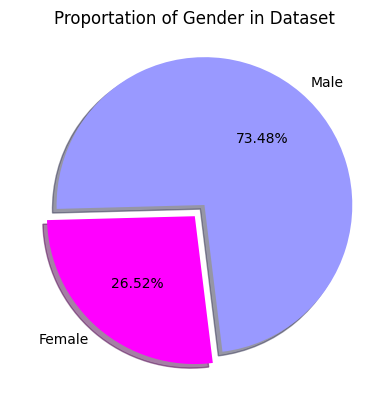

In [100]:
# Proportion of records differentiable based on the gender.

plt.pie(df.gender.value_counts(),
        labels = ['Male', 'Female'],
        colors = ['#99F', '#F0F'],
        autopct = '%.2f%%',
        explode = [0.1, 0],
        shadow = True,
        startangle = 277)

# Chart Decoration.
plt.title('Proportation of Gender in Dataset')

plt.show()

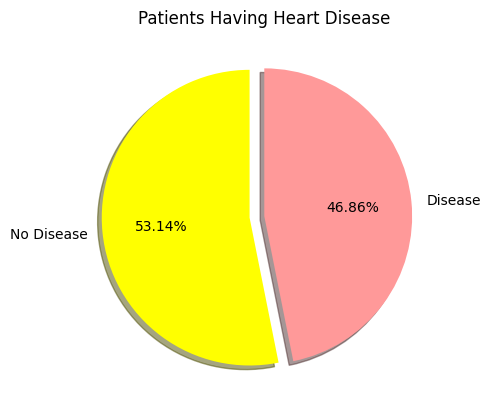

In [101]:
# Patients who are having a heart disease.

plt.pie(df.target.value_counts(),
        labels = ['No Disease', 'Disease'],
        colors = ['#FF0', '#F99'],
        autopct = '%.2f%%',
        explode = [0.1, 0],
        shadow = True,
        startangle = 90)

# Chart Decoration.
plt.title('Patients Having Heart Disease')

plt.show()

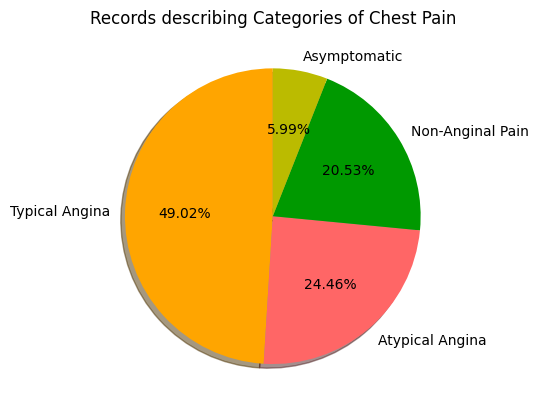

In [102]:
# Number of records providing various categories of chest pain in the dataset.

plt.pie(df.chest_pain_type.value_counts(),
        labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'],
        colors = ['#FFA500', '#F66', '#090', '#BB0'],
        autopct = '%.2f%%',
        shadow = True,
        startangle = 90)

# Chart Decoration.
plt.title('Records describing Categories of Chest Pain')

plt.show()

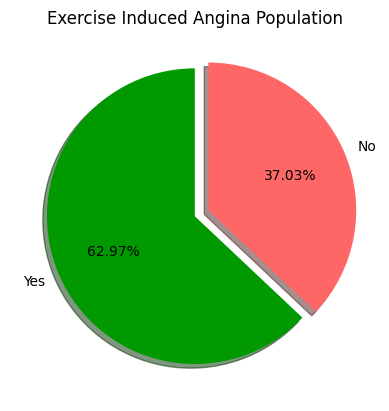

In [103]:
# Number of records having exercise angina in the dataset.

plt.pie(df.exercise_angina.value_counts(),
        labels = ['Yes', 'No'],
        colors = ['#090', '#F66'],
        autopct = '%.2f%%',
        explode = [0, 0.1],
        shadow = True,
        startangle = 90)

# Chart Decoration.
plt.title('Exercise Induced Angina Population')

plt.show()

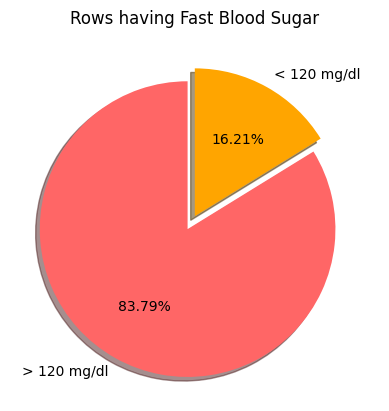

In [104]:
# Number of records describing how widely fast blood sugar exists.

plt.pie(df.fasting_blood_sugar.value_counts(),
        labels = ['> 120 mg/dl', '< 120 mg/dl'],
        colors = ['#F66', '#FFA500'],
        autopct = '%.2f%%',
        explode = [0.1, 0],
        shadow = True,
        startangle = 90)

# Chart Decoration.
plt.title('Rows having Fast Blood Sugar')

plt.show()

## Correlation:

Text(0.5, 1.0, 'Figure 1. Correlation between Features (Heat-Map)')

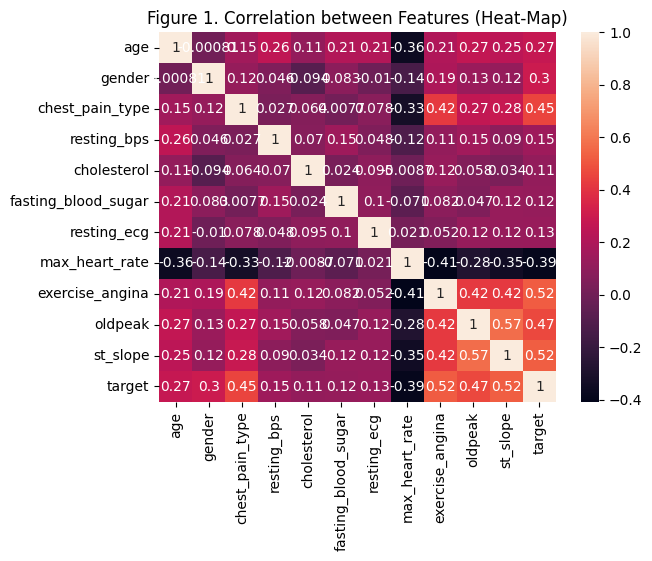

In [105]:
# Ploting the heatmap for finding the correlation between every feature.

ax = plt.axes()

sns.heatmap(df.corr(), annot = True)

# Styling the plot.
ax.set_title('Figure 1. Correlation between Features (Heat-Map)')

#### While there is not much of a correlation found between the fields, there are some where the correlation lies around 0.5:
- `oldpeak` & `st_slope` = 0.52
- `st_slope` & `target` = 0.51
- `exercise_angina` & `target` = 0.48
- `chest_pain_type` & `target` = 0.46

## Understanding the ratios in categorical data we have.

### Field: Target

In [106]:
# Counting the value of the tagerted column.
df.target.value_counts()

0    541
1    477
Name: target, dtype: int64

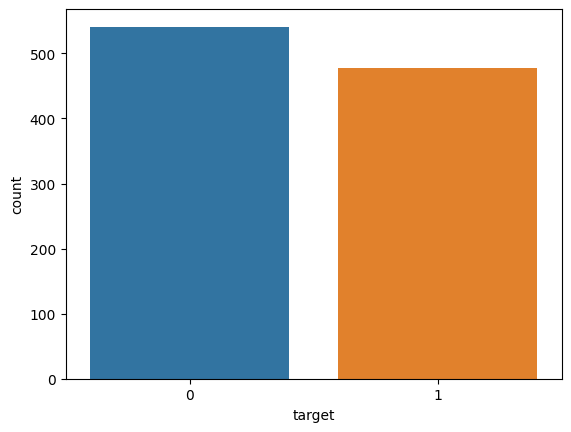

In [107]:
# Countplot for the target to find disease or non disease.
sns.countplot(data = df, x = 'target')
plt.xlabel = 'Target (0 = No Disease, 1 = Disease)'
plt.show()

In [108]:
def dataset_insights(count, field_1, field_2, label_field_1, label_field_2):
  '''
  Provides insight for a specific field categorizable.

  # Parameters

  count : int
    Number of records in a column of dataframe.

  field_1 : str
    First field to be shown.

  field_2 : str
    Second field to be shown.

  label_field_1 : str
    First field label/name.

  label_field_2 : str
    Second field label/name.
  '''

  print('Dataset Insights:')
  print('-' * 17)

  # Showing the value count of the trageted column with the reference variable.
  print(f'Total { label_field_1 }: { field_1 }')
  print(f'Total { label_field_2 }: { field_2 }')

  print('-' * 17)

  # Finding the ratio in the targeted column of the dataset.
  print(f'{ label_field_1 } (%): { round((field_1 / count * 100), 2) }%')
  print(f'{ label_field_2 } (%): { round((field_2 / count * 100), 2) }%')

In [109]:
# Finding the ratio of whether the patient is having heart disease in our dataset.
non_targeted = len(df[df.target == 0])
targeted = len(df[df.target == 1])

dataset_insights(count = len(df.gender), field_1 = non_targeted, field_2 = targeted, label_field_1 = 'Non-Targeted', label_field_2 = 'Targeted')

Dataset Insights:
-----------------
Total Non-Targeted: 541
Total Targeted: 477
-----------------
Non-Targeted (%): 53.14%
Targeted (%): 46.86%


### Field: Gender

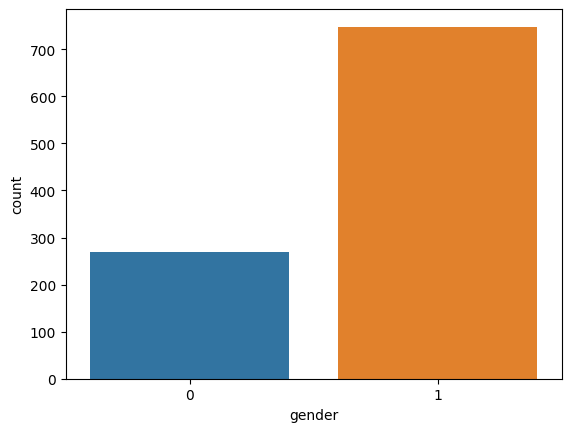

In [110]:
# Countplot for the gender whether the patient is male or female.
sns.countplot(data = df, x = 'gender')
plt.xlabel = 'Gender-Based Patients (0 = Female, 1 = Male)'

In [111]:
# Finding the ratio of Males and Females in our dataset.
females = len(df[df.gender == 0])
males = len(df[df.gender == 1])

dataset_insights(count = len(df.gender), field_1 = females, field_2 = males, label_field_1 = 'Females', label_field_2 = 'Males')

Dataset Insights:
-----------------
Total Females: 270
Total Males: 748
-----------------
Females (%): 26.52%
Males (%): 73.48%


## Let us target the `target` field to gain more insights with the data.

In [112]:
# Finding the average values for each field when grouped with the `target` column.
df.groupby('target').mean()

,age,gender,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
target,,,,,,,,,,,
0,50.872458,0.611830,2.761553,128.552825,236.684167,0.121996,0.634011,151.787329,0.134935,0.444244,1.290203
1,56.041929,0.874214,3.622642,132.810013,247.015723,0.207547,0.861635,132.915911,0.637317,1.336371,1.922432


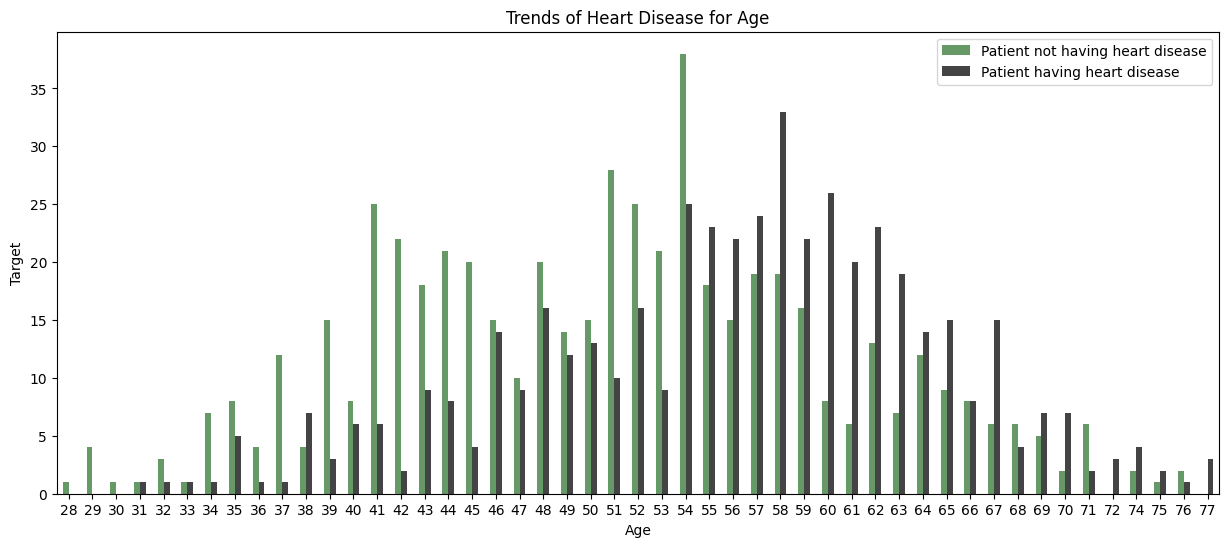

In [113]:
# How does the age becomes a factor for the patient to have a heart disease?

# The crosstab() is used for simple computing tabulation of two or more factor.
# Using crosstab() to group the `age` and the `target` fields which helps to plot this chart easily.
pd.crosstab(df.age, df.target).plot(kind = 'bar',
                                    xlabel = 'Age',
                                    ylabel = 'Target',
                                    title = 'Trends of Heart Disease for Age',
                                    color = ['#696', '#444'],
                                    figsize = (15, 6))

# Decorating the chart.
plt.legend(['Patient not having heart disease', 'Patient having heart disease'])
plt.xticks(rotation = 0)

plt.show()

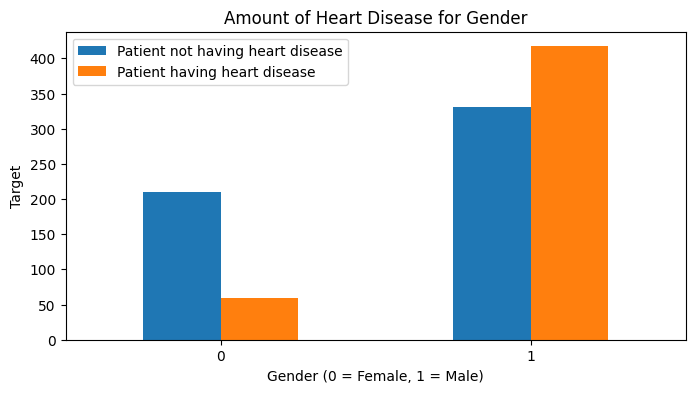

In [114]:
# How many the patients are having the heart disease gender-wise?

pd.crosstab(df.gender, df.target).plot(kind = 'bar',
                                       xlabel = 'Gender (0 = Female, 1 = Male)',
                                       ylabel = 'Target',
                                       title='Amount of Heart Disease for Gender',
                                       figsize = (8, 4))

# Chart Decoration.
plt.legend(['Patient not having heart disease', 'Patient having heart disease'])
plt.xticks(rotation = 0)

plt.show()

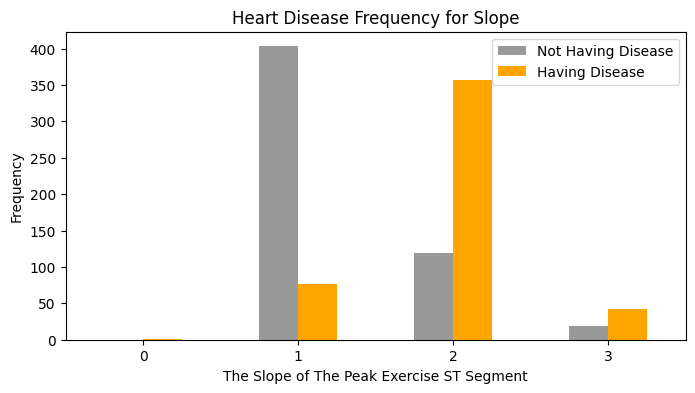

In [115]:
# Creating the bar charts for the slope exercies segment.

pd.crosstab(df.st_slope, df.target).plot(kind='bar',
                                         xlabel = 'The Slope of The Peak Exercise ST Segment',
                                         ylabel = 'Frequency',
                                         title = 'Heart Disease Frequency for Slope',
                                         figsize=(8, 4),
                                         color=['#999','#FFA500'])

# Chart Decoration.
plt.legend(['Not Having Disease', 'Having Disease'])
plt.xticks(rotation = 0)

plt.show()

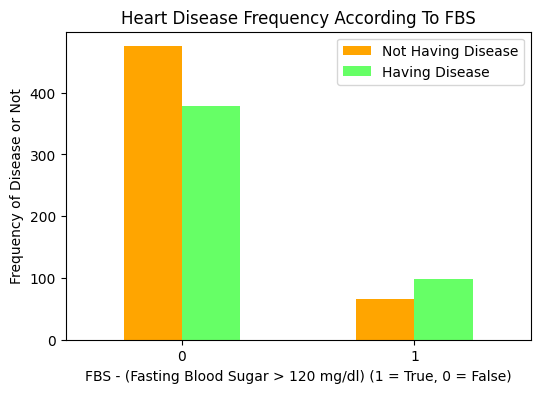

In [116]:
# Creating the bar chart for the patients having the `fasting_blood_sugar` having 120 mg/dl.
pd.crosstab(df.fasting_blood_sugar, df.target).plot(kind='bar',
                                                    xlabel = 'FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = True, 0 = False)',
                                                    ylabel = 'Frequency of Disease or Not',
                                                    title = 'Heart Disease Frequency According To FBS',
                                                    figsize = (6, 4),
                                                    color=['#FFA500', '#6F6'])

# Chart Decoration.
plt.legend(['Not Having Disease', 'Having Disease'])
plt.xticks(rotation = 0)

plt.show()

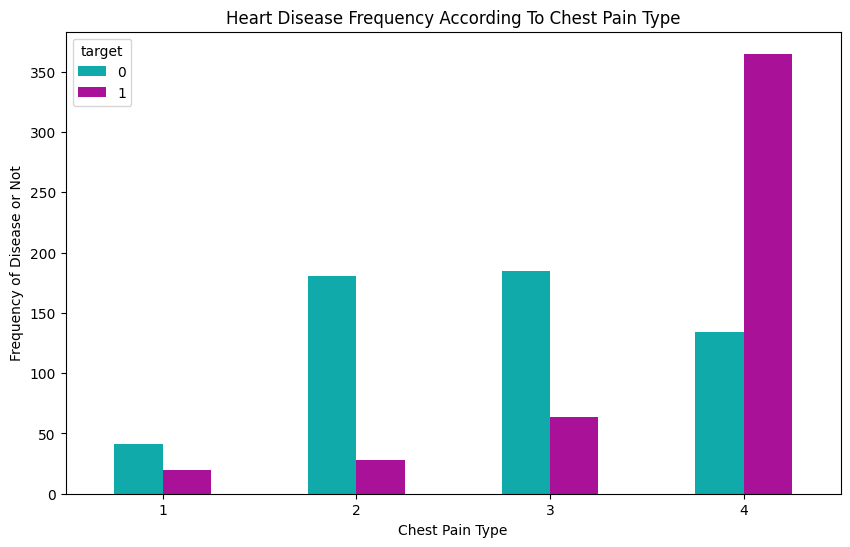

In [117]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind='bar',
                                                xlabel = 'Chest Pain Type',
                                                ylabel = 'Frequency of Disease or Not',
                                                title = 'Heart Disease Frequency According To Chest Pain Type',
                                                color = ['#1AA','#A19'],
                                                figsize = (10, 6))

# Chart Decoration.
plt.xticks(rotation = 0)

plt.show()

## Now it is time to explore `age` column for extract some information out of the dataset.

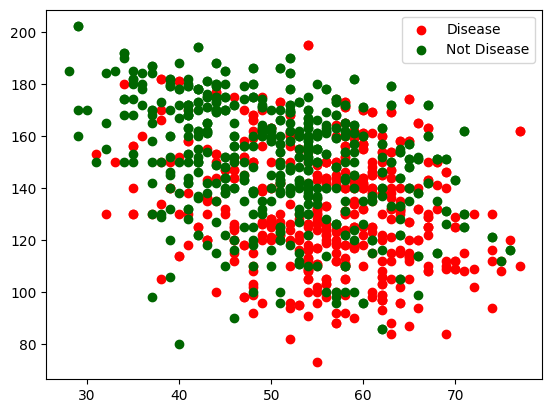

In [118]:
# Scattering Max Heart Rate Age-Wise.
plt.scatter(x = df.age[df.target == 1], y = df.max_heart_rate[(df.target == 1)], c = '#F00')
plt.scatter(x = df.age[df.target == 0], y = df.max_heart_rate[(df.target == 0)], c = '#060')

# Chart Decoration.
plt.legend(['Disease', 'Not Disease'])
plt.xlabel = 'Age'
plt.ylabel = 'Maximum Heart Rate'

plt.show()

<Axes: xlabel='age'>

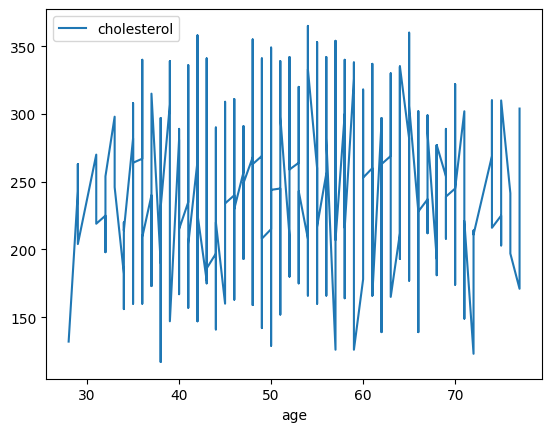

In [119]:
# Since cholesterol plays an indespensible role in human health, what is the age where it has affected the most?
df.sort_values(by = 'age').plot(x = 'age', y = 'cholesterol')

## Now might be a really good time for us to find the trends using the `gender` feature.

<img src = '[https://i.pinimg.com/originals/1a/f8/55/1af855efa6d9ecb063e05109bcfe06ca.gif[Remove-Brackets]]' />
<br>
<img src = '[https://media.giphy.com/media/D3l1DgR5ah5hm/giphy.gif[Remove-Brackets]]' />

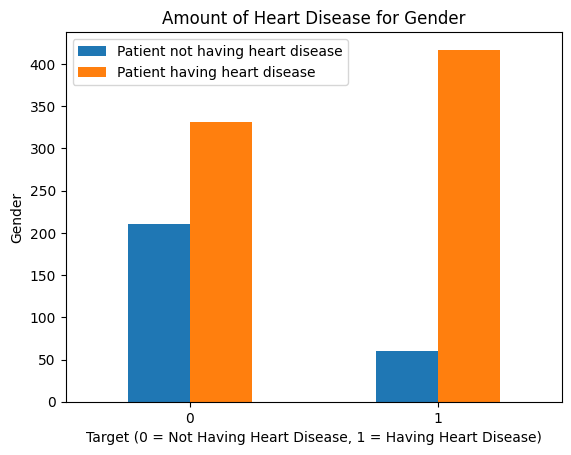

In [120]:
# How many the patients are having the heart disease based on gender?

pd.crosstab(df.target, df.gender).plot(kind = 'bar',
                                       xlabel = 'Target (0 = Not Having Heart Disease, 1 = Having Heart Disease)',
                                       ylabel = 'Gender',
                                       title = 'Amount of Heart Disease for Gender')

# Chart Decoration.
plt.legend(['Patient not having heart disease', 'Patient having heart disease'])
plt.xticks(rotation = 0)

plt.show()

<center><font color = '#0FF' size = '8%'>Modeling</font></center>

## Dummy Variables

In [121]:
a = pd.get_dummies(df.chest_pain_type, prefix = 'chest_pain_type')
c = pd.get_dummies(df.st_slope, prefix = 'st_slope')

In [122]:
frames = [df, a, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,gender,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,st_slope_0,st_slope_1,st_slope_2,st_slope_3
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0,0,1,0,0,0,1,0,0
1,49,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1,0,0,1,0,0,0,1,0
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0,0,1,0,0,0,1,0,0
3,48,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1,0,0,0,1,0,0,1,0
4,54,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0,0,0,1,0,0,1,0,0


In [123]:
df = df.drop(columns = ['chest_pain_type', 'st_slope'])
df.head()

,age,gender,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,st_slope_0,st_slope_1,st_slope_2,st_slope_3
0,40,1,140.0,289.0,0,0,172.0,0,0.0,0,0,1,0,0,0,1,0,0
1,49,0,160.0,180.0,0,0,156.0,0,1.0,1,0,0,1,0,0,0,1,0
2,37,1,130.0,283.0,0,1,98.0,0,0.0,0,0,1,0,0,0,1,0,0
3,48,0,138.0,214.0,0,0,108.0,1,1.5,1,0,0,0,1,0,0,1,0
4,54,1,150.0,195.0,0,0,122.0,0,0.0,0,0,0,1,0,0,1,0,0


## Logistic Regression

In [124]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
<img src = '[https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863[Remove-Brackets]]' />

In [125]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


### Train and Test Split (80/20)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [128]:
# Transpose Matrices.
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [129]:
# For Comparing Various Models.
accuracies = {}

## K-Nearest Neighbour (KNN) Classification

### KNN Algorithm
<img src = 'http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png' />

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
# KNN Model

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)

prediction = knn.predict(x_test.T)

print('{} NN Score: {:.2f}%'.format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 84.80%


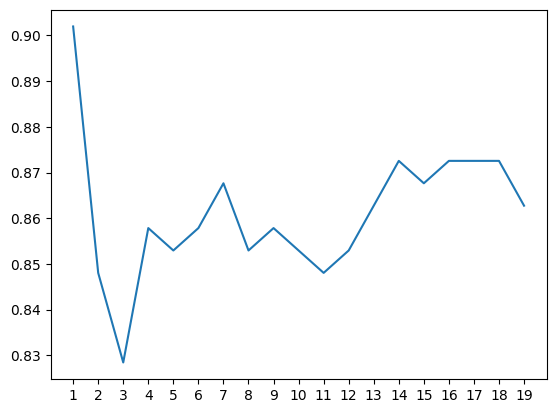

Maximum KNN Score is 90.20%


In [132]:
# Try to find the best value for k.
scoreList = []

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)

    scoreList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel = 'K Value'
plt.ylabel = 'Score'
plt.show()

acc = max(scoreList) * 100
accuracies['KNN'] = acc
print('Maximum KNN Score is {:.2f}%'.format(acc))

As you can see above if we define k as 3-7-8 we will reach maximum score.

## Support Vector Machine (SVM) Algorithm

<img src = 'https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg' />
<br>
<img src = 'https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg' />

In [133]:
from sklearn.svm import SVC

In [134]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 84.80%


## Decision Tree Algorithm

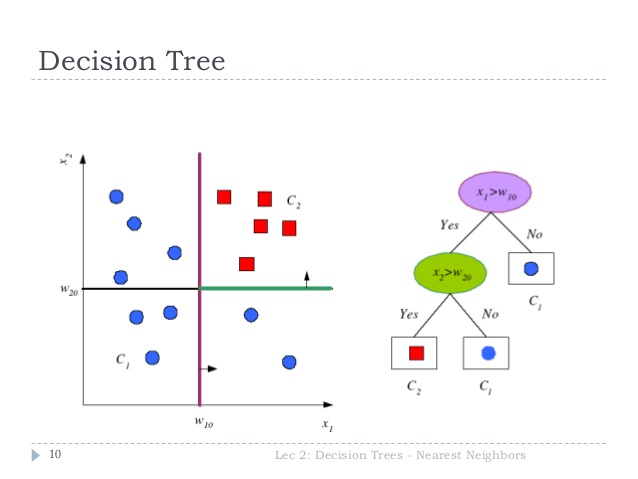

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy {:.2f}%'.format(acc))

Decision Tree Test Accuracy 89.22%


Test Accuracy of Decision Tree Algorithm: 86.55%!

## Random Forest Classification

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
# Random Forest Classification.
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest'] = acc
print('Random Forest Algorithm Accuracy Score : {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy Score : 91.18%


## Comparing Models

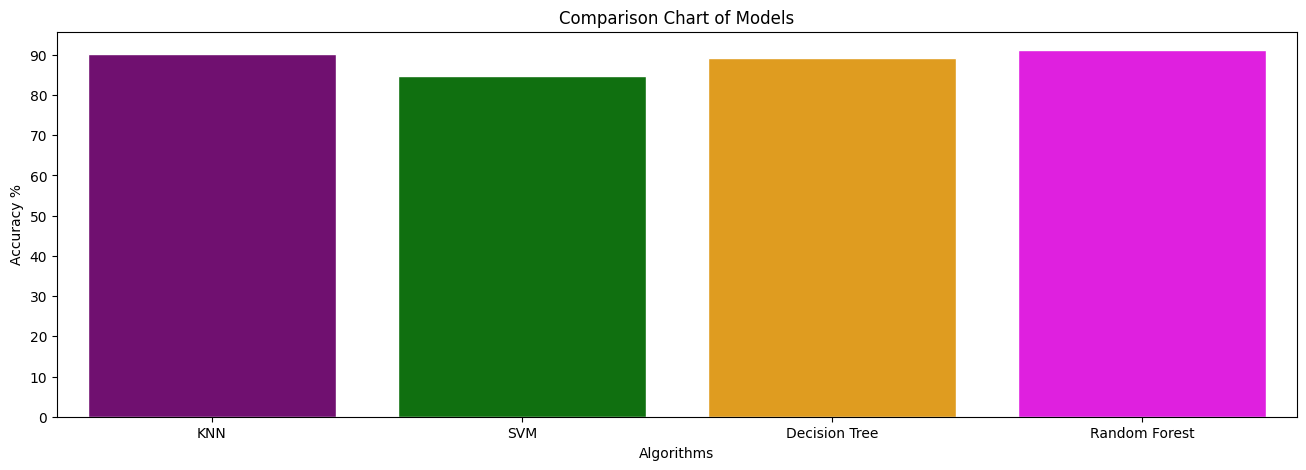

In [139]:
# Models Comparison.

# Chart Decoration.
colors = ['purple', 'green', 'orange', 'magenta', '#CFC60E', '#0FBBAE']
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.title('Comparison Chart of Models')

# Using Seaborn to plot the bar chart.
sns.set_style('whitegrid')
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = colors)

# Adding labels to the axis.
ax.set(xlabel = 'Algorithms', ylabel = 'Accuracy %')

# Plotting the Bar Chart.
plt.show()

<center><font color = '#0FF' size = '8%'>Conclusion</font></center>

Eventhough not having a large amount of data as comparable in today's world, it has allowed us to create a simple model and then use various machine learning explainability tools and techniques to peek inside. At the start, we hypothesised, using researched domain knowledge that factors such as <b>cholesterol</b> and <b>age</b> would be <i>major factors</i> in the <i>model</i>. This dataset did not show that. Instead, the number of major factors and aspects of ECG results dominated. We actually feel like we have learnt a thing or two about heart disease, which will help us in future to open our books of knowledge instead of finding for the existing ones while analyzing for a similar dataset/field/sector.

In our opinion, this sort of approach will become increasingly important as machine learning has a greater and greater role in health care.

<center><font color = '#0FF' size = '6%'>References</font></center>

- https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4
- https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124
- https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests
- https://www.bhf.org.uk/informationsupport/risk-factors
- https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack
- https://www.simplypsychology.org/boxplots.html
- https://litfl.com/st-segment-ecg-library/
- https://gndec.ac.in/~jagdeepmalhi/ihdps/